# Assignment 3: Classification with Logistic Regression

# Total: /100

## Instructions

* Complete the assignment

* Once the notebook is complete, restart your kernel and rerun your cells

* Submit this notebook to owl by the deadline

* You may use any python library functions you wish to complete the assignment.

## The Dataset

AIM: To explain how machine learning can help in a bank marketing campaign. The goal of our classifier is to predict, using a logistic regression, if a client may subscribe to a fixed term deposit. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be (â€˜yesâ€™) or not (â€˜noâ€™) subscribed.

The dataset contains both numerical and categorical input variables, while the response variable ('target') takes value 1 in case of 'yes' and 0 in case of 'no'.

You can read more about the data and the variables [here](https://archive.ics.uci.edu/ml/datasets/bank+marketing).

In [1]:
# You may need these
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve, auc

import seaborn as sns


import matplotlib.pyplot as plt
%matplotlib inline

## Question 1: /15 pts

1. Read in the `bank_A3.csv` dataset and display the first 5 rows.
2. Print out all columns in the dataset and list categorical variables. Use the build-in function `get_dummies()` to convert all categorical variables (**exclude target variable**) to dummy variables. You may read the official explanations for more information on `get_dummies()` [here](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html). What's the size of the dataframe after transforming it?
3. Map the target values from yes/no to 1/0. What is the baseline accuracy for this classification problem? Round into 1 decimal place (for example, 50.1% or 0.501).

1.1 Read the dataset and display the first 5 rows

In [2]:
# Question 1.1 code here
df = pd.read_csv("bank_A3.csv")
display(df.head())

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,target
0,58,management,married,tertiary,0,2143,1,0,5,may,4.35,1,-1,0,unknown,no
1,44,technician,single,secondary,0,29,1,0,5,may,2.52,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,0,2,1,1,5,may,1.27,1,-1,0,unknown,no
3,35,management,married,tertiary,0,231,1,0,5,may,2.32,1,-1,0,unknown,no
4,28,management,single,tertiary,0,447,1,1,5,may,3.62,1,-1,0,unknown,no


1.2 Print out all columns in the dataset and **list** all categorical variables in the answer part. Use the build-in function `get_dummies()` to convert all categorical variables (**excluding `target` variable**) to dummy variables. What's the size of the dataframe after transforming?

In [3]:
# Question 1.2 code here

print("Dataframe Columns:")
for i in df.columns: # print out all columns
    print(i)
    
print("\nCategorical Columns: ")
display(df.select_dtypes(include=['object']).columns.tolist()) # finding categorical columns

df = pd.get_dummies(df, prefix = ['job', 'marital', 'education', 'month', 'poutcome'], columns = ['job', 'marital', 'education', 'month', 'poutcome'])
display(df.size)

Dataframe Columns:
age
job
marital
education
default
balance
housing
loan
day
month
duration
campaign
pdays
previous
poutcome
target

Categorical Columns: 


['job', 'marital', 'education', 'month', 'poutcome', 'target']

1797004

**YOUR ANSWER HERE:** job, marital, education, month, poutcome, and target are the categorical variables. The dataframe size after transforming is 44 columns and 1,797,004 entries.

1.3. What is the baseline accuracy for this classification problem? Round into 3 decimal place (for example, 0.501).

In [4]:
# Your code here
df.target.value_counts()
baseline_acc = 36202/(36202+4639)
print('Baseline Accuracy: %.3f' %baseline_acc)

Baseline Accuracy: 0.886


**YOUR ANSWER HERE:** The baseline accuracy is 0.886.

## Question 2: /5 pts

Split the data into train and test for the outcome/response and the predictor variables. Hold out 30% of observations as the test set.  Pass `random_state=0` to `train_test_split` to ensure you get the same train and tests sets as the solution. Your dependent variable in the the dataset is named as `target`.

In [5]:
# Question 2 code here.
X = df.drop('target', axis = 'columns').values
y = df.target.values

Xtrain, Xtest, ytrain, ytest = train_test_split(X,y, test_size = 0.3, random_state = 0)

## Question 3: /5 pts

Read the documentation for [sklearn's `LogisticRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).  In no more than 2 sentences per bullet point, answer the following in your own words.

* Does `LogisticRegression` use a penalty by default?  If yes, what penalty?

**YOUR ANSWER HERE:** Yes, the default is L2 or Ridge penalty.
    
* If we apply a penalty during learning, what difference do you expect to see in the resulting coefficients, relative to not applying a penalty during learning?

**YOUR ANSWER HERE:** Expect the resulting coefficients to be closer to zero. i.e Have a smaller absolute value
    
* If using the default settings of `LogisticRegression` in `sklearn`, should you include a column of 1s in your feature/design matrix? Briefly explain why or why not.

**YOUR ANSWER HERE:**

## Question 4: /25 pts


4.1 Create a instance of sklearn's `LogisticRegression` object for **unpenalized** logistic regression.
Using this object, **run a logisitic regression analysis** of `target` (y-variable) against `age`,`default` and `balance` (x-variables) using your training data. Report the parameters of your model as indicated with the `print` function.

In [6]:
# Question 4 code here
BANKLR = LogisticRegression(penalty="none", max_iter=10000)

# create new train and test sets for required variables
Xtrain_simple = Xtrain[:,[0,4,5]]
Xtest_simple = Xtest[:,[0,4,5]]

banklr = BANKLR.fit(Xtrain_simple, ytrain)

In [7]:
print(f'The parameters of the model asociated to age, default and balance are respectively: {banklr.coef_}')

The parameters of the model asociated to age, default and balance are respectively: [[ 0.00646312 -0.64870983 -0.0128839 ]]


In [8]:
print(f'The intercept of the model is:{banklr.intercept_}')

The intercept of the model is:[-2.0313577]


4.2 Compute the label-based criteria we discussed in the Lesson for your three variables only classifier **using the test data**. Use a threshold of 0.5. Answer the questions in this text box below. (Note that you may have a warning in your code while running the performance matrix and it is designed to have it for this assignment)

In [9]:
## Put code here to compute criteria:
def compute_performance(yhat, y, classes):
    # First, get tp, tn, fp, fn
    tp = sum(np.logical_and(yhat == classes[1], y == classes[1]))
    tn = sum(np.logical_and(yhat == classes[0], y == classes[0]))
    fp = sum(np.logical_and(yhat == classes[1], y == classes[0]))
    fn = sum(np.logical_and(yhat == classes[0], y == classes[1]))

    print(f"tp: {tp} tn: {tn} fp: {fp} fn: {fn}")
    
    # Accuracy
    acc = (tp + tn) / (tp + tn + fp + fn)
    
    # Precision
    precision = tp / (tp + fp)
    
    # Recall
    recall = tp / (tp + fn)
    
    # Sensitivity
    sensitivity = recall
    
    # Specificity
    specificity = tn / (fp + tn)
    
    # Print results
    print("Accuracy:",round(acc,3),"Recall:",round(recall,3),"Precision:",round(precision,3),
          "Sensitivity:",round(sensitivity,3),"Specificity:",round(specificity,3))
    

In [10]:
## Put the code you need to answer the following questions.

ytest_hat = banklr.predict(Xtest_simple) # obtain y hat for test set

compute_performance(ytest_hat, ytest, banklr.classes_)

tp: 0 tn: 10870 fp: 0 fn: 1383
Accuracy: 0.887 Recall: 0.0 Precision: nan Sensitivity: 0.0 Specificity: 1.0


C:\Users\VBran\AppData\Local\Temp/ipykernel_23004/3853002090.py:15: RuntimeWarning: invalid value encountered in long_scalars
  precision = tp / (tp + fp)


* How many of the test instances are labeled positive by your classifier?

**YOUR ANSWER HERE:** None are predicted positive.

* Does this classifier reach the baseline accuracy? Why did the warning message appear? 

**YOUR ANSWER HERE:** Yes, it reaches baseline accuracy as it always predicts 'no'. Thus baseline accuracy is met exactly. The warning message appeared due to division by zero when trying to calculate precision. 

* Is this classifier useful for classifying the target? Explain in one or two sentences using the performance matrix results.

**YOUR ANSWER HERE:** No it is not useful. Since Recall is 0, F-measure is also 0, which is bad. Also, although the accuracy is 0.887, the balanced accuracy is only 0.5. The classifier doesn't correctly identify any positives, so it is not useful. 

## Question 5: /5 pts
Now fit a logistic regression model with default penalty method to the training data and include all the variables in the data frame (except for `target`) in the cell below. You will want to make a new object like you did for the simpler model. Print the parameters (variables and bias) you obtain.

In [11]:
# Code for Question 6
BANKLR2 = LogisticRegression(max_iter = 10000)

# use original train and test sets now
banklr2 = BANKLR2.fit(Xtrain, ytrain)

print(f'The parameters of the model are respectively: {banklr2.coef_}')
print(f'The intercept of the model is:{banklr2.intercept_}')

The parameters of the model are respectively: [[-3.54589984e-03  1.05348954e-04  3.57808884e-05 -6.98547884e-01
  -3.16027046e-01 -4.59676543e-06  2.47808171e-01 -9.82366803e-02
   2.94193979e-04  4.25640992e-02  1.40482152e-01 -2.67613457e-01
  -3.04914026e-01 -3.72548060e-01 -7.73812561e-02 -1.25874679e-01
   4.55338374e-01 -2.80250389e-01 -1.72306990e-01  4.51144368e-01
  -9.20839391e-02 -1.06904925e-01 -2.16236850e-01 -4.54913993e-01
  -8.17619853e-02 -4.22378109e-01 -2.66766042e-01 -6.37686781e-02
   1.71795451e-01 -6.19894422e-01  2.83190650e-01 -1.40947833e-01
  -8.38822981e-01 -7.69159487e-01 -5.38173089e-01  1.59781750e+00
  -9.38155215e-01 -7.64109982e-01  9.82865861e-01  8.20680722e-01
  -1.02732359e+00  1.41177396e+00 -1.13736320e+00]]
The intercept of the model is:[-0.76878295]


## Question 6: /15 pts

In the cell below, Compute the label-based criteria we discussed in the Lesson for new classifier using the test data. (You don't have to copy the function down into this cell; just call it again here.) Use a threshold of 0.5. 

In [12]:
# Code for answering questions in the below cell
ytest_hat2 = banklr2.predict(Xtest)

compute_performance(ytest_hat2, ytest, banklr2.classes_)

tp: 464 tn: 10626 fp: 244 fn: 919
Accuracy: 0.905 Recall: 0.336 Precision: 0.655 Sensitivity: 0.336 Specificity: 0.978



* How many of the test instances are labeled positive by your classifier?

**YOUR ANSWER:** tp + fp = 708 instances labeled positive

* Is this classifier **better or worse than the previous classifier** for classifying our target? Explain in one or two sentences.*

**YOUR ANSWER:** It is better than the previous classifier because it now identifies at least some positives. The F-measure is now 0.444 which is much better than before. Now the accuracy increased and also the balanced accuracy now is 0.657 which is better than for the other classifier.

## Question 7: /15 pts
In the cell below, predict the probability coding your own sigmoid function (do NOT use  the predict function from sklearn). Compare the first 5 rows using the models constructed in question 4 and question 5.

In [13]:
# Your code here
sigmoid = lambda x: 1 / (1 + np.exp(-x))

In [14]:
# First 5 probabilities using question 4 model
z = np.dot(Xtest_simple, banklr.coef_.T) + banklr.intercept_
sigmoid(z)[0:5]

array([[0.1022601 ],
       [0.14361427],
       [0.10772093],
       [0.13289418],
       [0.10708914]])

In [15]:
# First 5 probabilities using question 5 model
z2 = np.dot(Xtest, banklr2.coef_.T) + banklr2.intercept_
sigmoid(z2)[0:5]

array([[0.081975  ],
       [0.02627345],
       [0.03082259],
       [0.03287794],
       [0.06944481]])

* Is the probability given by the sigmoid function the probability of a case being positive or negative?

**YOUR ANSWER:** Of being positive.

* How does the probability changes by just looking over the first 5 cases. Does the change of probability actually change the classification results?

**YOUR ANSWER:** The probability of the result being positive decreases but the classification results for these 5 cases do not change. They are all still classified as negative.

# Question 8: /15 pts

Plot ROC curves for both of your classifiers using the cells below, then answer the following questions, computing whatever quantities you need to answer them.


C:\Users\VBran\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'ROC Curve for Simple Classifier')

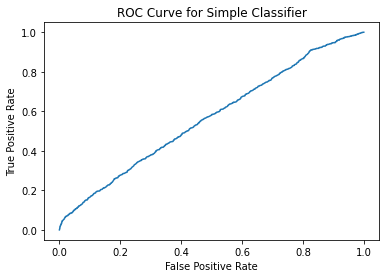

In [16]:
# ROC for the simplier classifier
ytest_prob = banklr.predict_proba(Xtest_simple)
fpr, tpr, _ = roc_curve(ytest, ytest_prob[:,1], pos_label="yes")
ax = sns.lineplot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Simple Classifier")

C:\Users\VBran\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'ROC Curve for Complete Classifier')

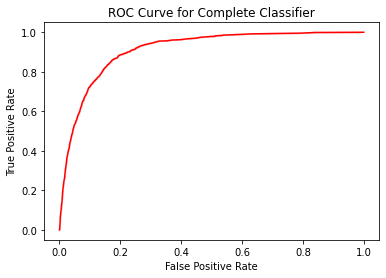

In [17]:
# ROC for all-variable classifier
y_test_prob2 = banklr2.predict_proba(Xtest)
fpr2, tpr2, _ = roc_curve(ytest, y_test_prob2[:,1], pos_label="yes")
ax2 = sns.lineplot(fpr2, tpr2, color  = 'red')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Complete Classifier")


* Which classifier has a higher estimated probability of correctly distinguishing between a positive and a negative instance? How do you know?

**YOUR ANSWER:**  The complete classifier has a higher probability because its AUROC is larger.
* How would you explain a result where a logistic regression classifier produces an AUROC that is below 0.5 (say, 0.3)?

**YOUR ANSWER:** An AUROC of 0.5 is that of a predictor that makes random guesses. So one that has an AUROC of 0.3 would have a 30% chance of correctly distinguishing between a positive and a negative instance. Thus, it selects incorrectly more often than not. 
